In [23]:
import pandas as pd

df =pd.read_csv('advertising.csv')

df.corr()['Sales']

TV           0.782224
Radio        0.576223
Newspaper    0.228299
Sales        1.000000
Name: Sales, dtype: float64

In [24]:
import statsmodels.api as sm
X=df['TV']
X=sm.add_constant(X)
y=df['Sales']
#ordinary least square
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.47e-42
Time:                        18:40:45   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [25]:
X = df['TV']
print("before: X shape: {}".format(X.shape))


X = sm.add_constant(X)
print("after: X shape: {}".format(X.shape))
type(results)

before: X shape: (200,)
after: X shape: (200, 2)


statsmodels.regression.linear_model.RegressionResultsWrapper

In [26]:
results.fittedvalues=results.params ['TV']*df['TV']+results.params['const']
results.resid=df['Sales'] -results.fittedvalues
df['fitted']=results.fittedvalues
df.sort_values(by='TV',ascending=True,inplace=True)


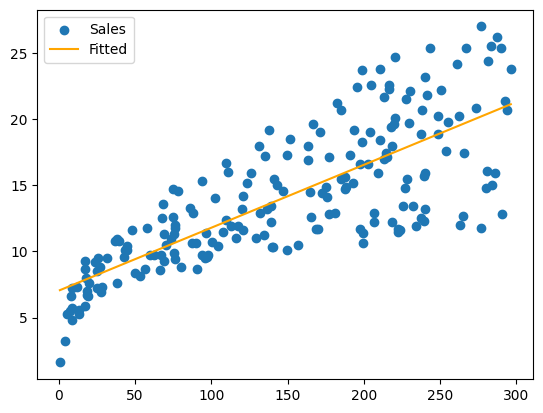

In [27]:
import matplotlib.pyplot as plt 

plt.scatter(df.TV,df.Sales,label='Sales')
plt.plot(df.TV,df.fitted,label='Fitted',color='orange')
plt.legend()

<AxesSubplot:xlabel='TV', ylabel='Sales'>

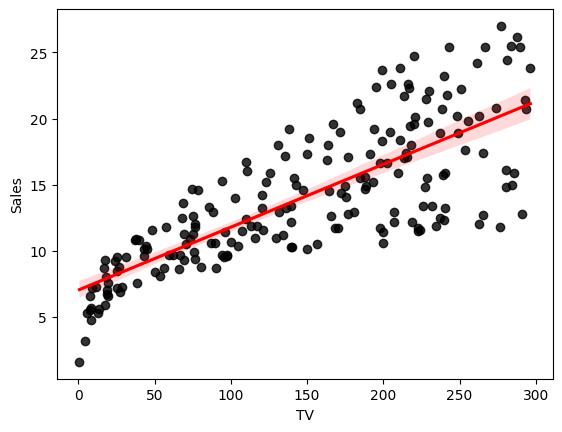

In [28]:
import seaborn as sns

sns.regplot(x=df.TV,y=df.Sales,scatter_kws={'color':'black'},line_kws={"color":'red'})


In [29]:
results.pvalues

const    1.406300e-35
TV       1.467390e-42
dtype: float64

<B>Mulivariate</B>

In [30]:
import  statsmodels.formula.api as smf

model=smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df)

results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 18 Jan 2023   Prob (F-statistic):           1.58e-96
Time:                        18:40:46   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [31]:
formulas=[
'Sales ~ TV + Radio + Newspaper',
'Sales ~ TV * Radio ',
'Sales ~ Radio + TV*Newspaper',
'Sales ~ Radio + TV',

]
for formula in formulas:
    
    result=smf.ols(formula,data=df).fit()
    print(formula)
    print('R^2 {:.4f} \t ADJ. R^2 {:.4f}'.format(result.rsquared,result.rsquared_adj))
    print('F-stats {:.4f} \t F-proba  {:.4f}'.format(result.fvalue,result.f_pvalue))
    print('AIC {:.4f} \t BIC  {:.4f}'.format(result.aic,result.bic))
    print('loglikehood {:.4f} '.format(result.llf))


Sales ~ TV + Radio + Newspaper
R^2 0.8972 	 ADJ. R^2 0.8956
F-stats 570.2707 	 F-proba  0.0000
AIC 780.3622 	 BIC  793.5555
loglikehood -386.1811 
Sales ~ TV * Radio 
R^2 0.9678 	 ADJ. R^2 0.9673
F-stats 1963.0569 	 F-proba  0.0000
AIC 548.2778 	 BIC  561.4711
loglikehood -270.1389 
Sales ~ Radio + TV*Newspaper
R^2 0.9035 	 ADJ. R^2 0.9015
F-stats 456.2410 	 F-proba  0.0000
AIC 769.8098 	 BIC  786.3014
loglikehood -379.9049 
Sales ~ Radio + TV
R^2 0.8972 	 ADJ. R^2 0.8962
F-stats 859.6177 	 F-proba  0.0000
AIC 778.3941 	 BIC  788.2891
loglikehood -386.1970 


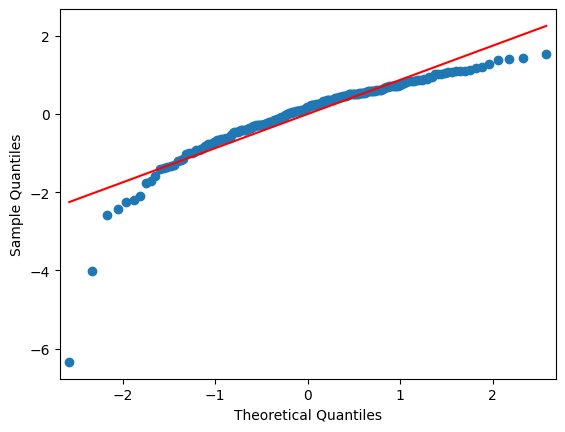

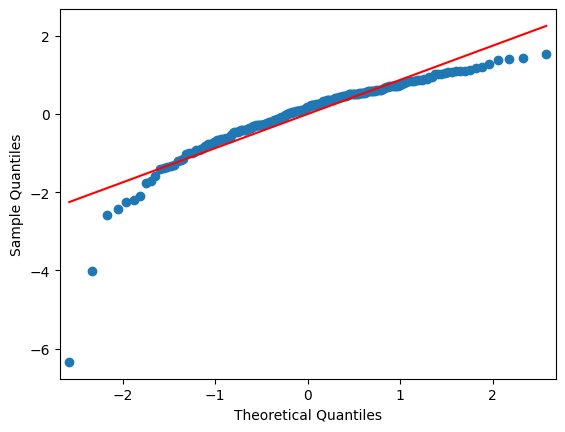

In [32]:
result7=smf.ols('Sales ~ TV * Radio ',data=df).fit()
sm.qqplot(result7.resid,line='r')

In [33]:
import numpy as np
R5='Sales ~ Radio * np.sqrt(TV) '
res5=smf.ols(R5,data=df).fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     8949.
Date:                Wed, 18 Jan 2023   Prob (F-statistic):          2.23e-209
Time:                        18:40:47   Log-Likelihood:                -120.98
No. Observations:                 200   AIC:                             250.0
Df Residuals:                     196   BIC:                             263.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.4444      0.179     24.778      0.000       4.091       4.798
Radio                -0.0501      0.006     -7.997      0.000      -0.062      -0.038
np.sqrt(TV)           0.4384      0.015     29.183      0.000       0.409       0.468
Radio:np.sqrt(TV)     0.0215      0.001     41.538      0.000       0.020       0.023
==============================================================================
Omnibus:                       35.531   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.449
Skew:                          -0.733   Prob(JB):                     6.90e-22
Kurtosis:                       6.089   Cond. No.                     1.94e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

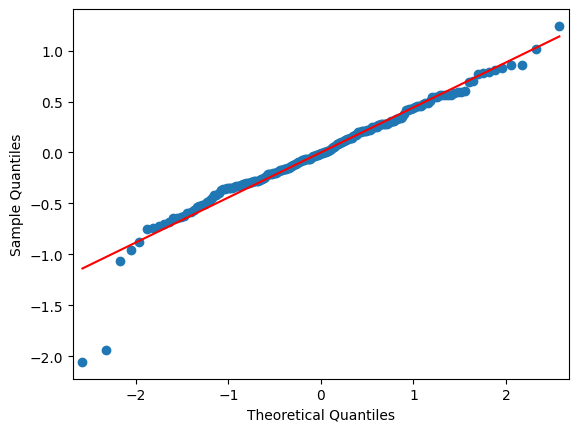

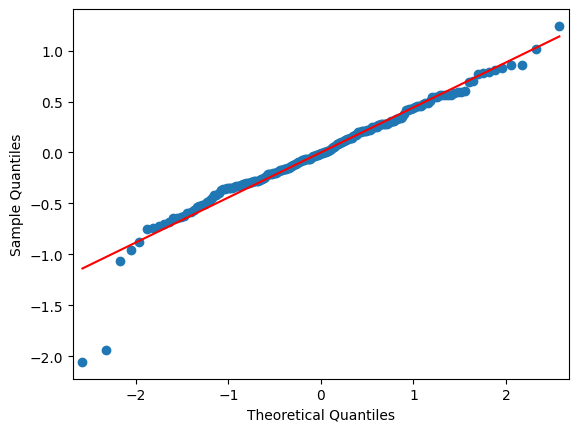

In [34]:
sm.qqplot(res5.resid,line='r')


In [35]:
from scipy import stats

x=(res5.resid -np.mean(res5.resid))/np.std(res5.resid)
stats.kstest(x,'norm')


KstestResult(statistic=0.06909128154816885, pvalue=0.2822172476246817)

In [36]:
df.corr()

,TV,Radio,Newspaper,Sales,fitted
TV,1.000000,0.054809,0.056648,0.782224,1.000000
Radio,0.054809,1.000000,0.354104,0.576223,0.054809
Newspaper,0.056648,0.354104,1.000000,0.228299,0.056648
Sales,0.782224,0.576223,0.228299,1.000000,0.782224
fitted,1.000000,0.054809,0.056648,0.782224,1.000000


<i> <b>VIF</b>:Variance inflation factor</i>

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
#vif for TV
vif(df[['TV','Radio','Newspaper']].values,0)

2.486771835198194

In [38]:
#Vif for Radio

vif(df[['TV','Radio','Newspaper']].values,1)


3.285462100162897

In [39]:
#vif for newspaper
vif(df[['TV','Radio','Newspaper']].values,2)


3.0552445106573844

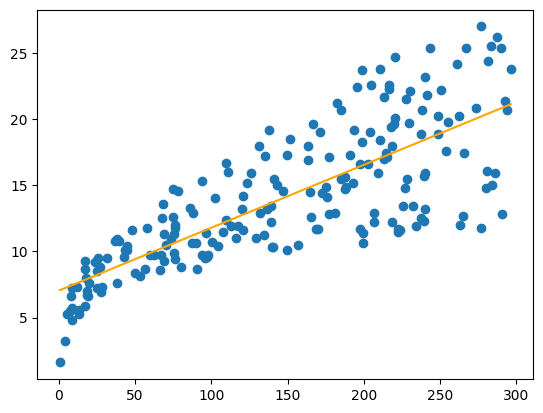

In [47]:
plt.scatter(df.TV,df.Sales)

plt.show()

In [48]:
df['sqrtTV']=np.sqrt(df.TV)
df['sqrTV']=np.square(df.TV)
df.head()


,TV,Radio,Newspaper,Sales,fitted,sqrtTV,sqrTV
130,0.7,39.6,8.7,1.6,7.065869,0.836660,0.49
155,4.1,11.6,5.7,3.2,7.227494,2.024846,16.81
78,5.4,29.9,9.4,5.3,7.289291,2.323790,29.16
56,7.3,28.1,41.4,5.5,7.379611,2.701851,53.29
126,7.8,38.9,50.6,6.6,7.403379,2.792848,60.84


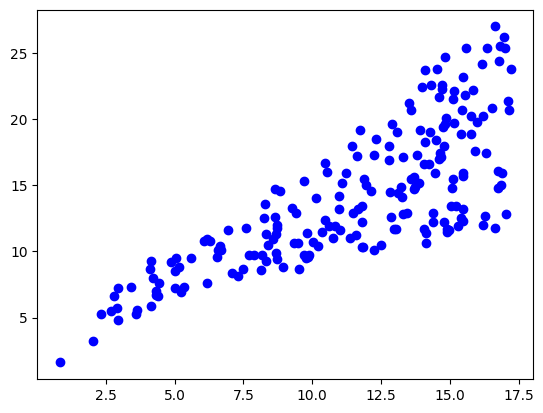

In [51]:
plt.scatter(df.sqrtTV,df.Sales,color='blue')
plt.show()

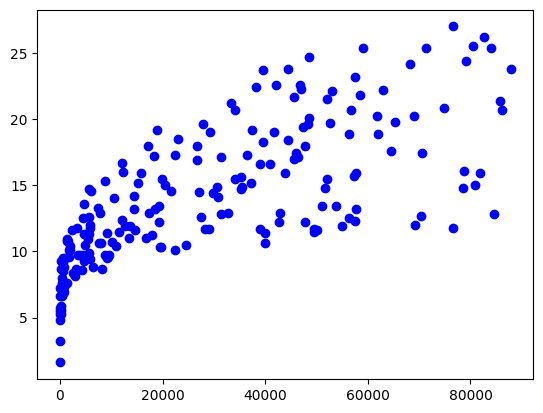

In [52]:
plt.scatter(df.sqrTV,df.Sales,color='blue')
plt.show()

In [60]:
kk=['Sales ~ TV','Sales ~ sqrTV','Sales ~ sqrtTV']
for k in kk:
    res=smf.ols(k,data=df).fit()
    print('formulas',k)
    print('R-squared {:.3f}'.format(res.rsquared))
    print('log likehood {:.3f}\n'.format(res.llf))

formulas Sales ~ TV
R-squared 0.612
log likehood -519.046

formulas Sales ~ sqrTV
R-squared 0.541
log likehood -535.800

formulas Sales ~ sqrtTV
R-squared 0.623
log likehood -516.164



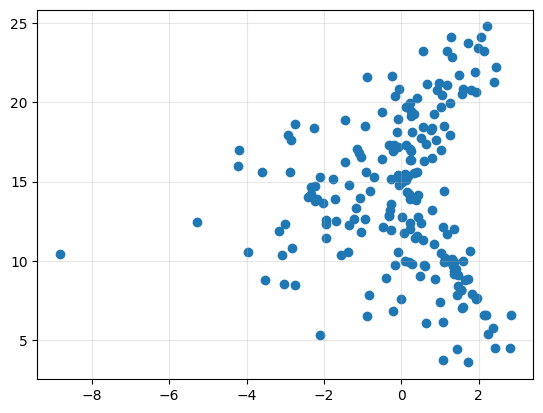

In [66]:
df['logSales']=np.log(df.Sales + 1)
rm=smf.ols('Sales ~ Newspaper + TV + Radio',data=df).fit()
plt.scatter(rm.resid, rm.fittedvalues)
plt.grid(alpha=0.3,visible=True)


Normality of residuals

In [68]:
import statsmodels.stats.api as sms

sms.jarque_bera(rm.resid)[1]
stats.kstest(rm.resid,'norm')

KstestResult(statistic=0.16255639830449076, pvalue=4.37537337064355e-05)

Auto correlation of the residuals

Durban Watson Test

if DW=2 not correlated
0 TO 2 positive correlation 
else negative correlation

In [69]:
from statsmodels.stats.stattools import durbin_watson


durbin_watson(rm.resid,axis=0)

1.3895531853637868

In [70]:
rm.params

Intercept    2.938889
Newspaper   -0.001037
TV           0.045765
Radio        0.188530
dtype: float64